### Artificial Neural Networks (ANN)  

###  What is an Artificial Neural Network?  
An **Artificial Neural Network (ANN)** is a computational model inspired by **biological neural networks** in the human brain. It consists of layers of **interconnected neurons** that process information and learn patterns from data.

---

### Structure of an ANN  
An ANN typically consists of three main types of layers:

1. **Input Layer**   
   - Takes raw input features (e.g., images, text, or numbers).  
   - Passes them to the next layer.

2. **Hidden Layers**  
   - Perform computations and extract patterns.  
   - Each neuron applies a mathematical transformation (e.g., weighted sum + activation function).

3. **Output Layer**  
   - Produces the final result (e.g., classification label or predicted value).

---

### How an ANN Works?  
1. **Forward Propagation:**  
   - Inputs pass through the network layer by layer.  
   - Neurons apply weights, biases, and activation functions.  

2. **Loss Calculation:**  
   - The network compares predictions to actual values using a **loss function** (e.g., MSE, Cross-Entropy).  

3. **Backward Propagation (Backpropagation):**  
   - Computes **gradients** using differentiation.  
   - Adjusts weights via **Gradient Descent** (or other optimizers like Adam).  

4. **Training Iteration (Epochs):**  
   - The process repeats multiple times until the model learns effectively.

---
### Common Activation Functions  
| Function   | Formula | Usage |
|------------|---------|--------|
| **Sigmoid** | \( \sigma(x) = \frac{1}{1 + e^{-x}} \) | Outputs probability (0 to 1) |
| **ReLU** | \( f(x) = \max(0, x) \) | Handles non-linearity, prevents vanishing gradient |
| **Softmax** | \( \frac{e^x}{\sum e^x} \) | Used for multi-class classification |

---

## 🛠 Applications of ANN  
- Image Recognition (e.g., Face Recognition)  
- Natural Language Processing (e.g., Chatbots)  
- Time Series Prediction (e.g., Stock Market Forecasting)  
- Healthcare (e.g., Disease Diagnosis)  

---

### Advantages of ANN  
✔ **Learns complex patterns** automatically.  
✔ **Can handle large datasets** and unstructured data (e.g., images, text).  
✔ **Adaptable** to various domains (vision, speech, NLP).  

###  Challenges of ANN  
- Requires **a lot of data** to perform well.  
- Training can be **computationally expensive**.  
- Difficult to interpret (often called a **"black box"** model).  

---


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [5]:
X_train_data = np.array([[0,0],[0,1],[1,0],[1,1]],dtype=np.float32)
y_train_data = np.array([[0],[1],[0],[0]], dtype=np.float32)

In [6]:
X_train_data

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [7]:
y_train_data

array([[0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [8]:
# Define the number of neurons in each layer
n_input = 2 # no. of features
n_hidden = 4 # number of hidden units
n_output = 1 # number of output units



In [10]:
# Define placeholder for input and output
X = tf.Variable(tf.random.normal([1, n_input]), dtype=tf.float32)
y = tf.Variable(tf.random.normal([1, n_output]), dtype=tf.float32)

In [18]:
# Define biases and weights for each layer
w1 = tf.Variable(tf.random.normal([n_input,n_hidden])) # weights from input to hidden layer
b1 = tf.Variable(tf.random.normal([n_hidden])) # biases for hidden layer
w2 = tf.Variable(tf.random.normal([n_hidden,n_output]))# weights from hidden to output layer
b2 = tf.Variable(tf.random.normal([n_output])) # biases for output layer


In [21]:
# Define optimizer using TensorFlow 2.x API
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Compute gradients and apply them
with tf.GradientTape() as tape:
    z1 = tf.add(tf.matmul(X, w1), b1)  # Linear combination for hidden layer
    a1 = tf.nn.sigmoid(z1)  # Activation function

    z2 = tf.add(tf.matmul(a1, w2), b2)  # Linear combination for output layer
    a2 = tf.nn.sigmoid(z2)  # Activation function

    cost = tf.reduce_mean(tf.square(y - a2))  # Mean squared error loss

gradients = tape.gradient(cost, [w1, b1, w2, b2])
optimizer.apply_gradients(zip(gradients, [w1, b1, w2, b2]))


<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

Epoch: 0, Loss: 0.25057080388069153
Epoch: 100, Loss: 0.2504335641860962
Epoch: 200, Loss: 0.25031185150146484
Epoch: 300, Loss: 0.25020208954811096
Epoch: 400, Loss: 0.25010156631469727
Epoch: 500, Loss: 0.2500079274177551
Epoch: 600, Loss: 0.24991945922374725
Epoch: 700, Loss: 0.24983441829681396
Epoch: 800, Loss: 0.24975141882896423
Epoch: 900, Loss: 0.24966922402381897
Predictions : 
[[0.50076175]
 [0.48802727]
 [0.511492  ]
 [0.49681795]]
Actual: 
[[0.]
 [1.]
 [1.]
 [0.]]


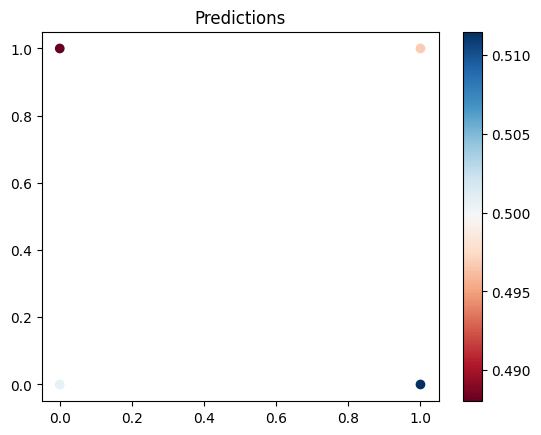

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define training data (XOR problem)
X_train_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y_train_data = np.array([[0],[1],[1],[0]], dtype=np.float32)

# Define neural network model
class XORModel(tf.keras.Model):
    def __init__(self):
        super(XORModel, self).__init__()
        self.hidden = tf.keras.layers.Dense(4, activation='sigmoid')  # Hidden layer with 4 neurons
        self.output_layer = tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer

    def call(self, x):
        x = self.hidden(x)
        return self.output_layer(x)

# Initialize model and optimizer
model = XORModel()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
loss_fn = tf.keras.losses.MeanSquaredError()

# Train model for 1000 epochs
for epoch in range(1000):
    with tf.GradientTape() as tape:
        predictions = model(X_train_data)
        loss = loss_fn(y_train_data, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.numpy()}")

# Test on unseen data
X_test = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y_test = np.array([[0],[1],[1],[0]], dtype=np.float32)

# Get model predictions
y_pred = model(X_test).numpy()

# Print predictions
print(f"Predictions : \n{y_pred}")
print(f"Actual: \n{y_test}")

# Plot predictions
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred[:, 0], cmap='RdBu')
plt.title("Predictions")
plt.colorbar()
plt.show()
